In [2]:
import numpy as np

class LinearLayer:
    def __init__(self, input_dim, output_dim):
        """
        Initialize the linear layer.
        :param input_dim: The dimension of the input vector.
        :param output_dim: The dimension of the output vector.
        """
        self.weights = np.random.randn(input_dim, output_dim) * 0.01  # Small random weights
        self.biases = np.zeros((1, output_dim))  # Zero biases

    def forward(self, x):
        """
        Compute the forward pass of the linear layer.
        :param x: The input vector or matrix (batch size, input_dim).
        :return: The output of the layer.
        """
        return np.dot(x, self.weights) + self.biases

# Example usage
input_dim = 4  # Dimension of the input vector
output_dim = 2  # Dimension of the output vector

# Create a linear layer
layer = LinearLayer(input_dim, output_dim)

# Generate a random input vector
x = np.random.randn(1, input_dim)

# Compute the forward pass
output = layer.forward(x)

print("Input:", x)
print("Output:", output)

Input: [[-1.76834754  2.47473605 -0.23831875 -0.57344727]]
Output: [[ 0.00814779 -0.00277325]]


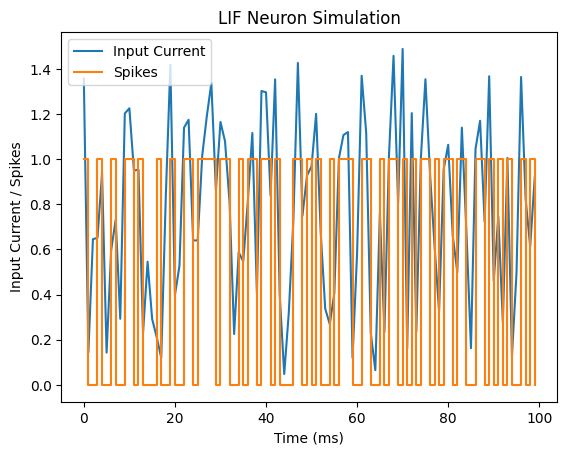

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, time_step=1, leak_factor=0.1, threshold=1.0, reset_potential=0.0):
        """
        Initialize the LIF neuron model.
        :param time_step: The time step for the simulation in ms.
        :param leak_factor: The factor by which the potential decreases every time step.
        :param threshold: The threshold potential for firing a spike.
        :param reset_potential: The potential to reset to after firing.
        """
        self.time_step = time_step
        self.leak_factor = leak_factor
        self.threshold = threshold
        self.reset_potential = reset_potential
        self.potential = 0.0
        self.spikes = []

    def input_current(self, current):
        """
        Apply an input current and update the neuron's state.
        :param current: The input current for the current time step.
        """
        self.potential += current - self.leak_factor * self.potential
        if self.potential >= self.threshold:
            self.spikes.append(1)  # Spike recorded
            self.potential = self.reset_potential
        else:
            self.spikes.append(0)  # No spike

    def simulate(self, input_currents):
        """
        Simulate the neuron over time with a given input current.
        :param input_currents: An array of input currents over time.
        """
        for current in input_currents:
            self.input_current(current)

# Example simulation
time = np.arange(0, 100, 1)  # 100 ms simulation with 1 ms time step
input_currents = np.random.uniform(0, 1.5, size=len(time))  # Random input currents

neuron = LIFNeuron()
neuron.simulate(input_currents)

# Plotting
plt.plot(time, input_currents, label='Input Current')
plt.plot(time, neuron.spikes, label='Spikes', drawstyle='steps-post')
plt.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Input Current / Spikes')
plt.title('LIF Neuron Simulation')
plt.show()